In [2]:
import os
import json
from graphviz import Digraph
from fpdf import FPDF


In [4]:
metadata_path = "event_store/events_metadata.json"
output_graph_path = "event_store/graph"
output_pdf_path = "event_store/event_graph_summary.pdf"

In [11]:
# Loading events metadata
if not os.path.exists(metadata_path):
    raise FileNotFoundError("Make sure 'events_metadata.json' exists. Process at least one tweet first.")

with open(metadata_path, "r") as f:
    event_metadata = json.load(f)

In [17]:
# Initializing Graphviz
dot = Digraph("EventGraph", format="png")
dot.attr(rankdir='LR', size='10')

In [18]:

# Build graph
for event_id, data in event_metadata.items():
    event_label = f"Event: {data.get('structured_data', {}).get('event_type', 'Unknown')}\\n{data.get('structured_data', {}).get('location', 'Unknown')}"
    event_node = f"event_{event_id[:8]}"
    dot.node(event_node, event_label, shape="ellipse", style="filled", fillcolor="lightcoral")

    structured = data.get("structured_data", {})
    for key, value in structured.items():
        if key == "summary":
            continue
        field_node = f"{event_node}_{key}"
        field_label = f"{key.replace('_', ' ').title()}\\n{value}"
        dot.node(field_node, field_label, shape="box", style="filled", fillcolor="lightblue")
        dot.edge(event_node, field_node)


In [19]:
# Rendering the graph as a PDF
graph_pdf_file = dot.render(output_graph_path, cleanup=True)


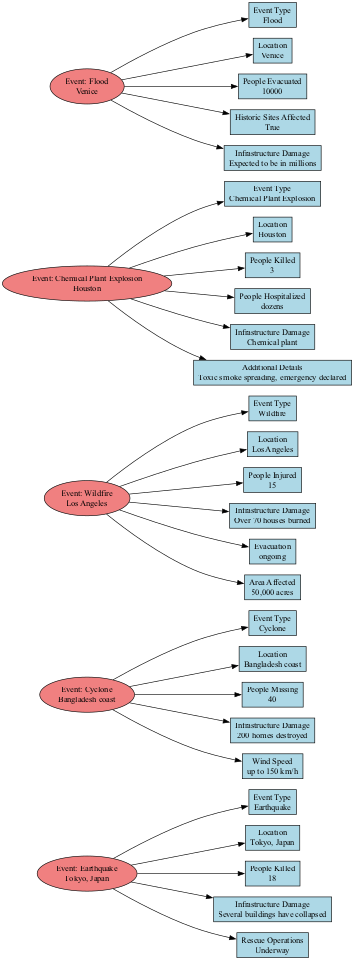

In [21]:
from IPython.display import display
from IPython.display import Image
display(Image(filename=graph_pdf_file))
